# EDA Of Haberman's Survival Data Set

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

According to given dataset..we mainly have following information

Number of Instances: 306 

Number of Attributes: 4 (including the class attribute)

Attribute Information:
   a)Age of patient at time of operation (numerical)
   b)Patient's year of operation (year - 1900, numerical)
   c)Number of positive axillary nodes detected (numerical)
   d)Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
   
Axillary node:
The axillary nodes are a group of lymph nodes located in the axillary (or armpit) region of the body. 
They perform the vital function of filtration and conduction of lymph from the upper limbs, pectoral region, and upper back.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Load haberman.csv into a pandas dataFrame.
Haberman = pd.read_csv("haberman.csv")

In [2]:
# (Q) how many data-points and featrues are there?
print (Haberman.shape)

(306, 4)


In [6]:
Haberman.head()     # print first 5 rows  

,age,year,axillary,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
Haberman.tail()   # print last 5 rows

,age,year,axillary,survived
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [3]:
#(Q) What are the column names in our dataset?
print (Haberman.columns)

Index(['age', 'year', 'axillary', 'survived'], dtype='object')


In [4]:
#(Q) How many data points for each class are present? 

Haberman["survived"].value_counts()

1    225
2     81
Name: survived, dtype: int64

After seeing the above datapoints for each classes we comes on some conclusion that
a) 225 patients are survived 5 or greater than 5 year
b) 81 are died within 5 year of there operation


# Some Statistics

In [19]:
print(Haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age         306 non-null int64
year        306 non-null int64
axillary    306 non-null int64
survived    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


Observation:

a)There are 4 columns, 3 features describing the datapoint and 1 for the output(ClassLabel)

b)Each column has 306 non-null values mean no missing value
    

In [9]:
Haberman.describe()

,age,year,axillary,survived
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observation:

a)Here no. of count is equal to 306 for all columns this means there is no any empty point in dataset

b)Mean and Median are almost same for all columns this means there is no outliers in the data or our data is not currupted

c)Maximum age is 83 and miniumum is 30,Maximum no. of axillary node is 52 and minimum is 0

d)mean year of operation being 1963.

e)The age of patients ranges from 30 to 83, with an average of 52.

f)77% of the patients are observed to have less than equal to 5  axiliary nodes and nearly 44% of the patients have no  axiliary nodes at all.


In [16]:
Haberman["age"].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

In [17]:
Haberman["year"].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: year, dtype: int64

Now we have four attributes..so lets draw some graph to find some information from that.


In [22]:
Haberman['survived'] = Haberman['survived'].map({1: True, 2: False})
colors = {True: 'green', False: 'red'}
(Haberman["survived"].value_counts() / len(Haberman)).plot.bar(color = ['green', 'red'])
(Haberman["survived"].value_counts() / len(Haberman))

True     0.735294
False    0.264706
Name: survived, dtype: float64

The dataset is imbalanced with 74% of datapoints belonging to class 1 and 26% belonging to the class 2

# Univariate Analysis
(pdf,cdf,boxplot,violinplot)


# PDF

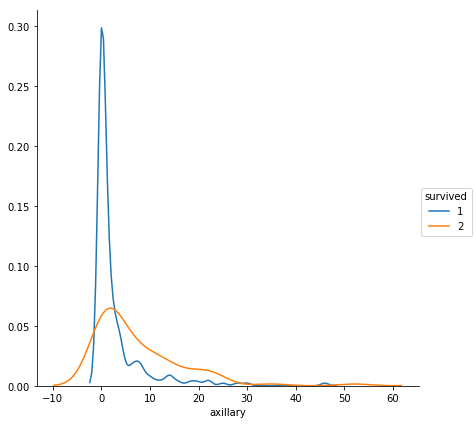

In [10]:
#Seaborn plot of petal_length's PDF.
sns.FacetGrid(Haberman,hue="survived", size=6) \
   .map(sns.kdeplot, "axillary") \
   .add_legend();
plt.show();

Observation:

After seeing above pdf we have only one conclusion that 
"if number of axillary node are less than chance of survival is more"

# CDF

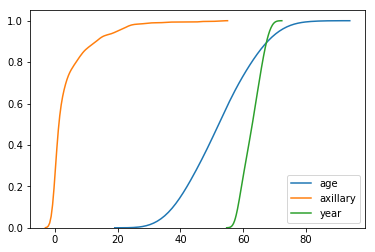

In [11]:
ax = sns.kdeplot(Haberman['age'], cumulative=True)
ax = sns.kdeplot(Haberman['axillary'], cumulative=True)
ax = sns.kdeplot(Haberman['year'], cumulative=True)
plt.show()

# BOX-PLOT

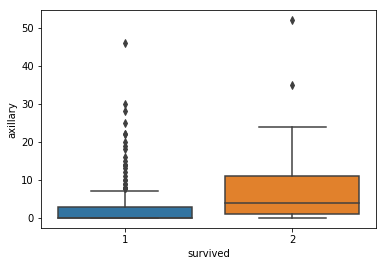

In [13]:
sns.boxplot(x='survived',y='axillary', data=Haberman)
plt.show()

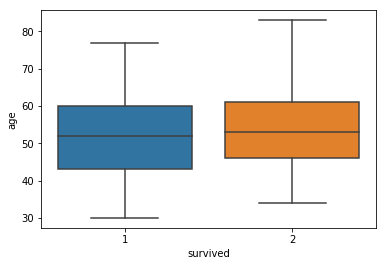

In [14]:
sns.boxplot(x='survived',y='age', data=Haberman)
plt.show()

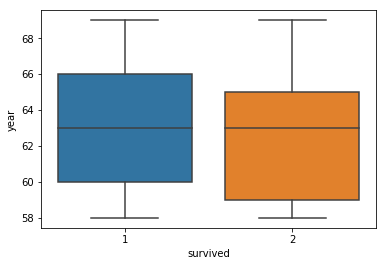

In [15]:
sns.boxplot(x='survived',y='year', data=Haberman)
plt.show()

Observatoion:
After seeing above box-plots we didn't comes on any conclusion,they are overlapping upto 50% to 70%

# BIVARIATE ANALYSIS
(Pair plot,Scatter Plot)

# PAIR PLOT

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


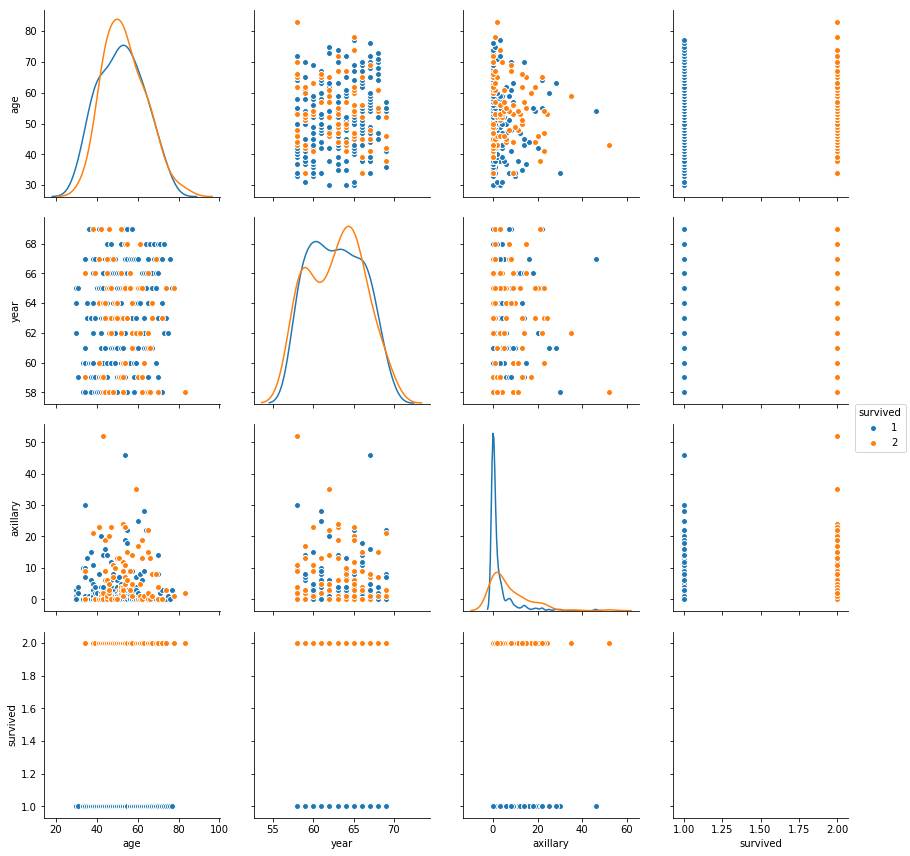

In [12]:
plt.close();
sns.pairplot(Haberman,hue="survived", size=3, diag_kind="kde");
plt.show()

Observation:
 a)All scatter plot are almost overlapped so we didn't get any information 

# Conclusion
 
After plotting all pdf,cdf,box-plot,pair plots,scatter plot etc. we get only one conclusion :

"If no. of axillary nodes is less,than survival of patients is more"

We need more features to comes on very good conlusion